# Pharmaceutical Companies Racing for Vaccine Portfolio Risk and Returns (Coronavirus)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Pharmaceutical Companie Vanccine 
symbols = ['MRNA']
start = '2021-01-01'
end = '2022-04-20'

In [3]:
df1 = pd.DataFrame()
for s in symbols:
    df1[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df1.index[-1] - df1.index[0]).days
days

474

In [7]:
df1.head()

MRNA
Date                  
2020-12-31  104.470001
2021-01-04  111.730003
2021-01-05  109.180000
2021-01-06  116.260002
2021-01-07  115.089996

In [8]:
# Next Ticker 
symbols = ['PFE']
start = '2021-01-01'
end = '2022-04-20'

In [9]:
df2 = pd.DataFrame()
for s in symbols:
    df2[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [10]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [11]:
number_of_years = delta.years

In [12]:
days = (df2.index[-1] - df2.index[0]).days
days

474

In [13]:
df2.head()

PFE
Date                 
2020-12-31  36.810001
2021-01-04  36.810001
2021-01-05  37.189999
2021-01-06  36.869999
2021-01-07  37.060001

In [14]:
# Next Ticker 
symbols = ['NVAX']
start = '2021-01-01'
end = '2022-04-20'

In [15]:
df3 = pd.DataFrame()
for s in symbols:
    df3[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [16]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [17]:
number_of_years = delta.years

In [18]:
days = (df3.index[-1] - df3.index[0]).days
days

474

In [19]:
df3.head()

NVAX
Date                  
2020-12-31  111.510002
2021-01-04  112.980003
2021-01-05  116.239998
2021-01-06  123.739998
2021-01-07  128.179993

In [20]:
# Next Ticker 
symbols = ['JNJ']
start = '2021-01-01'
end = '2022-04-20'

In [21]:
df4 = pd.DataFrame()
for s in symbols:
    df4[s] = yf.download(s,start,end)['Close']

[*********************100%***********************]  1 of 1 completed


In [22]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [23]:
number_of_years = delta.years

In [24]:
days = (df4.index[-1] - df4.index[0]).days
days

474

In [25]:
df4.head()

JNJ
Date                  
2020-12-31  157.380005
2021-01-04  156.500000
2021-01-05  158.339996
2021-01-06  159.830002
2021-01-07  160.369995

In [26]:
stocks = pd.concat([df1,df2,df3,df4],axis=1)
stocks.columns = ['MRNA','PFE','NVAX','JNJ'] 

In [27]:
stocks.head()

MRNA        PFE        NVAX         JNJ
Date                                                     
2020-12-31  104.470001  36.810001  111.510002  157.380005
2021-01-04  111.730003  36.810001  112.980003  156.500000
2021-01-05  109.180000  37.189999  116.239998  158.339996
2021-01-06  116.260002  36.869999  123.739998  159.830002
2021-01-07  115.089996  37.060001  128.179993  160.369995

In [28]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

MRNA    0.002458
PFE     0.001096
NVAX    0.000378
JNJ     0.000513
dtype: float64

In [29]:
stocks.pct_change(1).corr()

MRNA       PFE      NVAX       JNJ
MRNA  1.000000  0.168490  0.527324 -0.073465
PFE   0.168490  1.000000  0.114936  0.310145
NVAX  0.527324  0.114936  1.000000 -0.120196
JNJ  -0.073465  0.310145 -0.120196  1.000000

# Simulating Thousands of Possible Allocations

In [30]:
stocks.head()

MRNA        PFE        NVAX         JNJ
Date                                                     
2020-12-31  104.470001  36.810001  111.510002  157.380005
2021-01-04  111.730003  36.810001  112.980003  156.500000
2021-01-05  109.180000  37.189999  116.239998  158.339996
2021-01-06  116.260002  36.869999  123.739998  159.830002
2021-01-07  115.089996  37.060001  128.179993  160.369995

<AxesSubplot:xlabel='Date'>

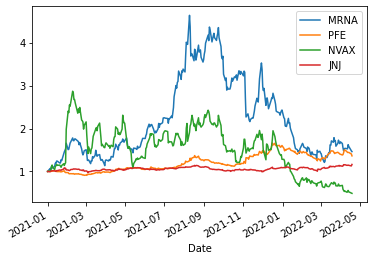

In [31]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [32]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

MRNA       PFE      NVAX       JNJ
Date                                              
2020-12-31       NaN       NaN       NaN       NaN
2021-01-04  0.069494  0.000000  0.013183 -0.005592
2021-01-05 -0.022823  0.010323  0.028855  0.011757
2021-01-06  0.064847 -0.008604  0.064522  0.009410
2021-01-07 -0.010064  0.005153  0.035882  0.003379

# Log Returns vs Arithmetic Returns

In [33]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

MRNA       PFE      NVAX       JNJ
Date                                              
2020-12-31       NaN       NaN       NaN       NaN
2021-01-04  0.067185  0.000000  0.013097 -0.005607
2021-01-05 -0.023087  0.010270  0.028446  0.011689
2021-01-06  0.062831 -0.008642  0.062526  0.009366
2021-01-07 -0.010115  0.005140  0.035253  0.003373

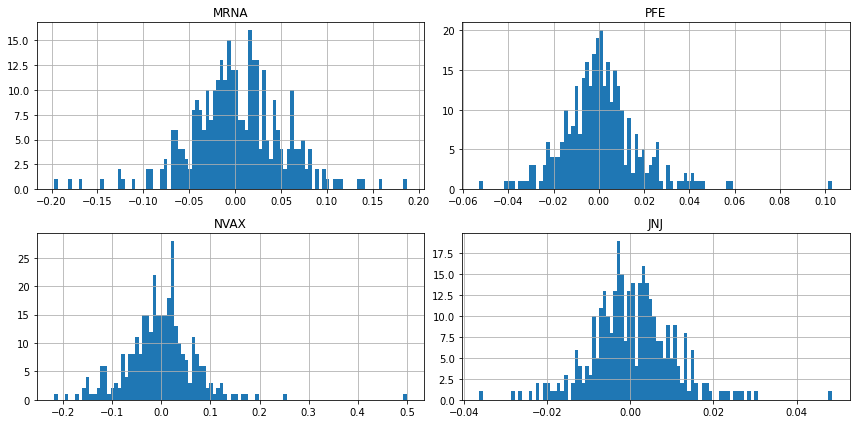

In [34]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [35]:
log_ret.describe().transpose()

count      mean       std       min       25%       50%       75%  \
MRNA  326.0  0.001165  0.050936 -0.197163 -0.028565 -0.001002  0.031584   
PFE   326.0  0.000950  0.016990 -0.052778 -0.008875  0.000000  0.008887   
NVAX  326.0 -0.002191  0.070824 -0.218234 -0.036488 -0.001419  0.031123   
JNJ   326.0  0.000464  0.009938 -0.036298 -0.005462  0.000144  0.005915   

           max  
MRNA  0.187071  
PFE   0.103055  
NVAX  0.499977  
JNJ   0.048507

In [36]:
log_ret.mean() * 252

MRNA    0.293515
PFE     0.239514
NVAX   -0.552130
JNJ     0.116925
dtype: float64

In [37]:
# Compute pairwise covariance of columns
log_ret.cov()

MRNA       PFE      NVAX       JNJ
MRNA  0.002594  0.000145  0.001963 -0.000036
PFE   0.000145  0.000289  0.000146  0.000053
NVAX  0.001963  0.000146  0.005016 -0.000072
JNJ  -0.000036  0.000053 -0.000072  0.000099

In [38]:
log_ret.cov()*252 # multiply by days

MRNA       PFE      NVAX       JNJ
MRNA  0.653796  0.036443  0.494775 -0.009004
PFE   0.036443  0.072746  0.036855  0.013256
NVAX  0.494775  0.036855  1.264051 -0.018233
JNJ  -0.009004  0.013256 -0.018233  0.024890

In [39]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['MRNA', 'PFE', 'NVAX', 'JNJ'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.2273295014777774


Expected Volatility
0.3789183160639913


Sharpe Ratio
0.5999432907840386


In [40]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [41]:
sharpe_arr.max()

1.0428862854848682

In [42]:
sharpe_arr.argmax()

1215

In [43]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [44]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

# Plotting the data

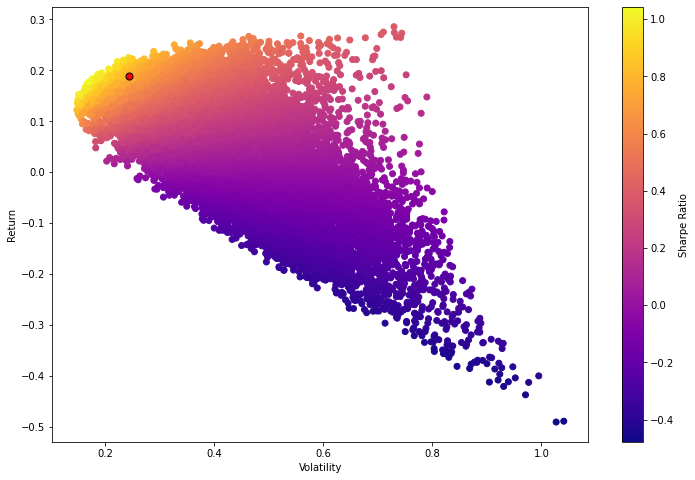

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')